### 목표
- wisconsin 대학 제공하는 유방암 데이터셋 활용하여 분류하는 모델(예측기) 만들어보자
- 최적의 하이퍼 파라미터를 찾는 그리트서치 적용해보자

In [1]:
# 단위를 크게크게 설정 -> 점점 줄여서

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split # 훈련, 테스트 데이터 분리
from sklearn.datasets import load_breast_cancer


### 데이터 불러오기

In [3]:
cancer_data = load_breast_cancer()
cancer_data # 번치 bunch 객체

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# 키값들만 확인
# ksys()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 데이터 벨류값 확인
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
# 데이터 레이블값(타겟) 확인
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# 레이블의 실제 이름 확인
cancer_data.target_names
# 0 - 'malignant' 악성
# 1 - 'benign' 양성

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# 특성의 이름 확인
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# 데이터 전체적인 정보 확인
# info() - 데이터프레임
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### 훈련데이터, 테스트 데이터로 분리
- X_train, X_test, y_train, y_test 순서로 분리
- 특성, 답, test_size=30%, random_state = 66

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,
                                                    cancer_data.target,
                                                    test_size=0.3,
                                                    random_state=66)

In [11]:
print('훈련문제',X_train.shape)
print('훈련답',y_train.shape)
print('테스트문제',X_test.shape)
print('테스트답',y_test.shape)

훈련문제 (398, 30)
훈련답 (398,)
테스트문제 (171, 30)
테스트답 (171,)


#### RandomForest모델
- 예측 모델 몇개 : n_estimators
- 데이터 시드 : random_state
- 분류와 회귀 모두 사용 가능

In [12]:
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류기

In [13]:
# 모델 객체 생성
# 예측기 총 100생성
# ran_state = 10
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)

In [14]:
# 모델 학습
# fit(훈련용문제,훈련용답)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [15]:
# 모델의 일반화 성능 확인하기
# 교차검증 (cross validation)
# model_selection 클래스 안에 있음
from sklearn.model_selection import cross_val_score

In [16]:
# cv = 5 설정하고, 성능 확인해보기 !!
rf_result = cross_val_score(rf_model,X_train,y_train,cv=5)
# 1. 정확도 배열 출력
print('정확도 배열:',rf_result)
# 2. 정확도 평균 출력
print('정확도 평균:',rf_result.mean())

정확도 배열: [0.95       0.9625     0.9375     1.         0.97468354]
정확도 평균: 0.9649367088607596


In [17]:
# 모델 예측
# predict
test_pre = rf_model.predict(X_test)
test_pre # 실제답과 다를 수 있음

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [18]:
# 모델 평가
# score(테스트 문제, 테스트답)
# metrics 클래스 ->  accuracy_score(예측값, 실제값)
from sklearn.metrics import accuracy_score
print('test정확도:',accuracy_score(test_pre,y_test))

# train 데이터의 정확도 확인
print('train정확도:',rf_model.score(X_train, y_train))

test정확도: 0.9707602339181286
train정확도: 1.0


#### GridSearch 적용하여 모델의 성능을 향상시켜보자
- 최적의 하이퍼 파라미터를 찾아보자

In [19]:
from sklearn.model_selection import GridSearchCV
# 내부적으로 교차검증 진행

In [20]:
# 최적의 파라미터 찾기 위해서
# 파라미터의 경우의 수를 설정
# 모델 객체 생성
# 그리드 서치 적용
params = {'n_estimators':[50,70,100],
        'max_depth':[3,5,7],
        'max_leaf_nodes':[2,4,6],
        'min_samples_split':[3,5,7]  
         }
model = RandomForestClassifier(random_state=10)
grid = GridSearchCV(model,params, cv=5, scoring = 'accuracy',n_jobs=-1,)
# n_jobs 코어 활용 개수 설정 : -1 사용가능한 만큼
# 그리드 서치 실행 fit
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 70, 100]},
             scoring='accuracy')

In [21]:
# 가장 높은 성능일 떄의 모델의 하이퍼 파라미터 확인
# 정확도 확인
print('파라미터 확인:',grid.best_params_)
print('정확도:',grid.best_score_)

파라미터 확인: {'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_split': 3, 'n_estimators': 100}
정확도: 0.9473101265822784


#### 모델 완성 및 영향력 높은 특성 확인

In [22]:
# 랜덤포레스트 모델 완성하기 ( 객체 생성하기 )
model_best = RandomForestClassifier(n_estimators=100,
                                   max_depth=5,
                                   max_leaf_nodes=6,
                                   min_samples_leaf=3,
                                   random_state=10)
# fit 학습
model_best.fit(X_train,y_train)

# 정확도 확인
# score - train, test
print('훈련데이터 정확도:',model_best.score(X_train,y_train))
print('테스트데이터 정확도:',model_best.score(X_test,y_test))

훈련데이터 정확도: 0.9748743718592965
테스트데이터 정확도: 0.9590643274853801


모델이 중요하게 여긴 특성 확인

<AxesSubplot:>

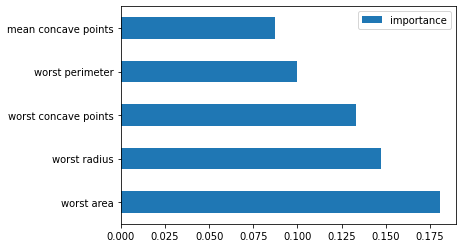

In [23]:
model_best.feature_importances_
# 인덱스 컬럼명으로 설정하여 df 구성
# 컬럼명도 명시 - importance
df1 = pd.DataFrame(model_best.feature_importances_,index=cancer_data.feature_names,
                  columns=['importance'])
df1_st = df1.sort_values(by='importance',ascending=False).head()
df1_st.plot.barh()

#### AdaBoost모델
- 부스팅 기법, 독립적으로 학습하는 모델x, 연속적으로 학습을 하는 모델
- 분류, 회귀 모두 사용 가능
- 이전 모델이 잘못 예측한 데이터샘플에 대하여 가중치 부여하여 다음 모델을 훈련시킴
- 예측기(트리모델) 개수 몇개 : n_estimators
- learning_rate : 가중치 갱신 변동폭 조정(0~1), 1.0 설정
- 사전 가지치기를 지원x

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# 모델 객체 생성
# 예측기 5개 만들어보자
# random_state = 42
ada_model = AdaBoostClassifier(n_estimators=5,
                              random_state=42)
# 모델 학습 fit (X_train,y_train) : 데이터에 맞춰서 모델이 학습
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

In [25]:
# 예측
# train 예측해보기
train_pre = ada_model.predict(X_train)
# test 예측해보기
test_pre = ada_model.predict(X_test)

print('학습데이터를 이용한 예측 :\n',train_pre)
print('테스트데이터를 이용한 예측 :\n',test_pre)

학습데이터를 이용한 예측 :
 [1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0
 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1]
테스트데이터를 이용한 예측 :
 [1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0
 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1
 0 0 1 

In [26]:
# 평가
from sklearn.metrics import accuracy_score
print('훈련 데이터 정확도:',accuracy_score(train_pre,y_train))
print('테스트 데이터 정확도:',accuracy_score(test_pre,y_test))

훈련 데이터 정확도: 0.964824120603015
테스트 데이터 정확도: 0.9415204678362573


In [27]:
# 모델의 하이퍼 파라미터를 조정하며 결과 변화를 살펴보자
# 내부적으로 생성되는 예측기 100
# random_state = 42 객체 생성
ada_model2 = AdaBoostClassifier(n_estimators=100,
                               random_state=42)
# 모델 학습
ada_model2.fit(X_train,y_train)
# 모델 평가
# 훈련, 테스트 모두 정확도 확인
# 모델.score
print('훈련 데이터 정확도 :',ada_model2.score(X_train,y_train))
print('훈련 데이터 정확도 :',ada_model2.score(X_test,y_test))

훈련 데이터 정확도 : 1.0
훈련 데이터 정확도 : 0.9707602339181286


#### GridSearch 적용하여 모델의 성능 개선시키기
- 다양한 파라미터를 교차검증하여 최적의 파라미터 찾기

In [28]:
from sklearn.model_selection import GridSearchCV
# 'learning_rate' : 가중치 변동폭 설정
# 튜닝할 매개변수 경우의 설정
params = {'n_estimators':[50,100,200],
         'learning_rate':[0.4,0.6,1.0]}
# 모델 객체 생성
# 예측기 개수, 학습률은 기본값 그래도 사용 - 따로 지정 안해도 됨
model = AdaBoostClassifier(random_state=42)
# 그리드서치 적용
grid = GridSearchCV(model,params,cv=5,scoring='accuracy',n_jobs=-1)

# 그리드서치 실행 fit
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.4, 0.6, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [29]:
# 가장 높은 성능일 때의 모델의 정확도와 하이퍼 파라미터 조합 확인
print('최고 성능:',grid.best_score_)
print('파라미터 조합',grid.best_params_)

최고 성능: 0.9674050632911392
파라미터 조합 {'learning_rate': 0.4, 'n_estimators': 200}


#### 모델 완성 및 영향력있는 특성 출력

In [30]:
# 모델 완성
model_best = AdaBoostClassifier(n_estimators=200,learning_rate=0.4, random_state=42)
# 모델 학습
model_best.fit(X_train,y_train)
# 모델 정확도
# 훈련용, 테스트용 모두 확인
tr_score = model_best.score(X_train,y_train)
te_score = model_best.score(X_test,y_test)

print('훈련데이터 정확도:',tr_score)
print('테스트데이터 정확도',te_score)


훈련데이터 정확도: 1.0
테스트데이터 정확도 0.9766081871345029


<AxesSubplot:>

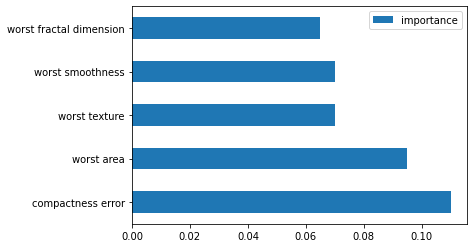

In [31]:
model_best.feature_importances_
# 인덱스 컬럼명으로 설정하여 df 구성
# 컬럼명도 명시 - importance
df1 = pd.DataFrame(model_best.feature_importances_,index=cancer_data.feature_names,
                  columns=['importance'])
df1_st = df1.sort_values(by='importance',ascending=False).head()
df1_st.plot.barh()

### Gradent Boosting 그래디언트 부스팅 모델
- 부스팅 기법 중 하나, adamodel 과 학습하는 것은 유사
- 강력한 사전 가지치기를 적용
- 회귀, 분류 모두 사용 가능
- n_estimators : 예측 모델의 개수
- learning_rate : 가중치 갱신 변동폭
- max_depth : 깊이 설정(모델의 복잡도 제어하는 하이퍼 파라미터)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# 모델 객체
# random_state = 0
# 하이퍼파라미터 값들 default
gb_model = GradientBoostingClassifier(random_state=0)

# 학습
gb_model.fit(X_train,y_train)

# 모델 평가
tr_score = gb_model.score(X_train,y_train)
te_score = gb_model.score(X_test,y_test)

print('훈련데이터 정확도:',tr_score)
print('테스트데이터 정확도:',te_score)

훈련데이터 정확도: 1.0
테스트데이터 정확도: 0.9649122807017544


In [34]:
# 튜닝할 매개변수 설정
params = {'n_estimators':[50,100,200],
         'max_depth':[1,2,3,4],
         'learning_rate':[0.1,0.2,0.4]}
#모델 생성
model = GradientBoostingClassifier(random_state=0)

# grid 적용
# 검증횟수 cv= 5
grid = GridSearchCV(model, params, cv=5, scoring='accuracy',n_jobs=-1)

# grid 실행(학습)
# 훈련데이터셋 사용
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.4],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [35]:
# 최고의 성능, 최적의 파라미터 조합 확인
print('최고의 성능:',grid.best_score_)
print('최적의 파라미터 조합:',grid.best_params_)

최고의 성능: 0.9724683544303797
최적의 파라미터 조합: {'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 200}


#### 모델 완성 및 중요한 특성 확인

In [36]:
model_best = GradientBoostingClassifier(n_estimators=200,
                                       max_depth=2,
                                       learning_rate=0.4,
                                       random_state=0)
# 모델 학습
model_best.fit(X_train,y_train)
# 모델 평가
#훈련데이터, 테스트 데이터 정확도 모두 확인
tr_score = model_best.score(X_train,y_train)
te_score = model_best.score(X_test,y_test)
print('훈련데이터:',tr_score)
print('테스트데이터:',te_score)

훈련데이터: 1.0
테스트데이터: 0.9473684210526315


In [ ]:
# 머신러닝의 궁극적인 목표 :test데이터가 여러번 들어오더라도 모두 비슷한 성능 내는모델
# -> 어떤 test데이터에서든지 일반적인 성능을 내는 모델 찾는 것 -> 일반화모델

### XGBoost 모델

- 결정 트리 기반의 앙상블 모델에서 가장 각광받고 있는 알고리즘의 하나

- 분류에 있어서 일반적으로 다른 머신 러닝 모델보다 뛰어난 성능을 나타냄

- GBM을 기반으로 하지만, GBM에서 제공하지 않는 Early Stopping 기능과 과대적합 방지를 위한 규제가 포함됨으로써 GBM의 단점인 느린 학습 시간과 과대적합의 문제를 해결하였음

- 대규모 머신 러닝 문제에 그래디언트 부스팅을 적용하려면 XGBoost를 사용

- 분류와 회귀가 모두 가능

In [37]:
#설치
!pip install xgboost

In [38]:
# xgboost 패키지 설치 후 버전확인
import xgboost
print(xgboost.__version__) # 더블언더바, 던더

1.5.2


In [41]:
from xgboost import XGBClassifier
# 객체 생성
xgb_clf = XGBClassifier(random_state=0)
# 학습
xgb_clf.fit(X_train,y_train)
# 평가
print('훈련데이터 정확도:',xgb_clf.score(X_train,y_train))
print('테스트데이터 정확도:',xgb_clf.score(X_test,y_test))

[12:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련데이터 정확도: 1.0
테스트데이터 정확도: 0.9824561403508771


C:\Users\smhrd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
